In [2]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
with open('Gift_Cards.json') as f:
    data = ndjson.load(f)

In [5]:
reviews_df = pd.DataFrame(data)

In [6]:
reviews_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1.0,25,False,"12 19, 2008",APV13CM0919JD,B001GXRQW0,{'Gift Amount:': ' 50'},LEH,"Amazon,\nI am shopping for Amazon.com gift car...",Merry Christmas.,1229644800,NaN
1,5.0,NaN,False,"12 17, 2008",A3G8U1G1V082SN,B001GXRQW0,{'Gift Amount:': ' 50'},Tali,"I got this gift card from a friend, and it was...",Gift card with best selection,1229472000,NaN
2,5.0,4,False,"12 17, 2008",A11T2Q0EVTUWP,B001GXRQW0,{'Gift Amount:': ' 50'},Z,aren't we going to save trees?! :) People who ...,A convenient and great gift for the environmen...,1229472000,NaN
3,5.0,NaN,False,"12 17, 2008",A9YKGBH3SV22C,B001GXRQW0,{'Gift Amount:': ' 25'},Giotravels,You can always get someone something from Amaz...,Totally make sense,1229472000,NaN
4,1.0,NaN,True,"12 17, 2008",A34WZIHVF3OKOL,B001GXRQW0,NaN,King Dad,Why take 50 dollars of good money with no limi...,Give CASH!,1229472000,NaN


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147194 entries, 0 to 147193
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         147194 non-null  float64
 1   vote            6341 non-null    object 
 2   verified        147194 non-null  bool   
 3   reviewTime      147194 non-null  object 
 4   reviewerID      147194 non-null  object 
 5   asin            147194 non-null  object 
 6   style           42375 non-null   object 
 7   reviewerName    147190 non-null  object 
 8   reviewText      147035 non-null  object 
 9   summary         147154 non-null  object 
 10  unixReviewTime  147194 non-null  int64  
 11  image           406 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 12.5+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

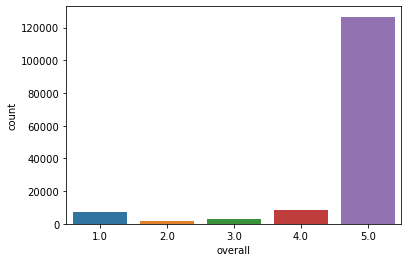

In [11]:
sns.countplot(data = reviews_df,x='overall')

In [12]:
len(reviews_df['asin'].value_counts(dropna=False))

1548

In [13]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [15]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)
undersampled_reviews['overall'].value_counts(dropna=False)

1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: overall, dtype: int64

In [16]:
undersampled_reviews

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
109968,1.0,4,False,"01 21, 2015",AP36MGWFVXAJG,B00MV9FCFQ,NaN,Lois Kilmister,This has failed me 3 times to work very unsati...,Failure,1421798400,NaN
126958,1.0,NaN,True,"01 31, 2016",A92HIQFVSBZXU,B019GIOH7S,NaN,Martin,i basically got robbed by the lady i gave this...,One Star,1454198400,NaN
111296,1.0,NaN,True,"02 2, 2017",A1SFQQE7YYW4LH,B00MV9P8MS,NaN,Amazon Customer,This is terrible. I purchased 50$ before Chris...,Bought 50$ but only showed $25.98. You stole m...,1485993600,NaN
77644,1.0,NaN,True,"01 25, 2018",A2XREU38W4XMI4,B00BXQIGA6,NaN,Betty,This also was a gift card for someone else .,One Star,1516838400,NaN
114908,1.0,NaN,True,"10 25, 2016",A32YOODBMFSDNU,B00PG8502O,NaN,Janet Kay Lee,It was returned to me and not delivered. So no...,Returned,1477353600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61497,5.0,NaN,True,"07 14, 2016",AJJHKY6UX4HF0,B00A4EK69C,NaN,Judi W. McEvers,Sure was handy!,Five Stars,1468454400,NaN
44096,5.0,NaN,True,"08 17, 2013",A13NIFCOVKY3JG,B0066AZGD4,NaN,girly girl,"When I send a gift card to one of my readers, ...",I love the personalized touch,1376697600,NaN
135614,5.0,NaN,True,"09 5, 2016",A68ZXMOB6PSMI,B01G44QKQI,NaN,Anneliese Knop,I purchased this ecard and designed it on my i...,Simple and Satisfying,1473033600,NaN
106267,5.0,3,True,"07 18, 2016",AJROOOQUKPJBT,B00KFLZKFE,NaN,Allison E.,got for my teen daughter. Iove that Amazon had...,got for my teen daughter. Iove that Amazon had...,1468800000,NaN


<AxesSubplot:xlabel='overall', ylabel='count'>

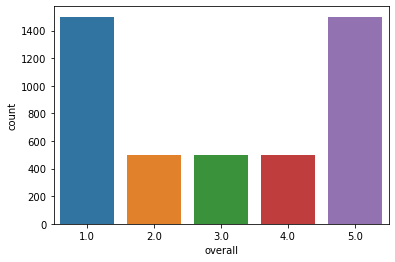

In [17]:
sns.countplot(data=undersampled_reviews,x='overall')

In [18]:
sample_100k_revs = reviews_df.sample(n=10000, random_state=42)

In [19]:
undersampled_reviews.to_csv('small_corpus.csv',index=False)

In [20]:
sample_100k_revs.to_csv('big_corpus.csv',index=False)